# The Leaky Integrate-and-Fire (LIF) Neuron
This notebook shows some pure Python code to simulate and interactively play with a leaky integrate-and-fire neuron.

---
## The Mathematics of the Model
The neuron model is as follows. There is a single variable **V** for the neuron: its membrane potential (the potential difference between the inside and outside of the cell).
In the absence of any input, the variable **V** evolves over time according to the differential equation:
$$

\frac{dV}{dt} = -\frac{V}{\tau}

$$
Here the constant **τ** is the time constant of the neuron, and controls how quickly the neuron integrates its inputs.
You can solve this differential equation to get:
$$

V(t) = V(0)e^{-t/\tau}

$$
In other words, **V** exponentially decays to the value **0**, and the smaller **τ** is, the faster it does it.

---
## Incoming Spikes
If the neuron receives an incoming spike with synaptic weight **w**, the membrane potential instantly increases by **w**:
$$

V \leftarrow V + w

$$
In the interactive widget below, incoming spikes arrive at times **t₀**, **t₁**, and **t₂**, which you can change to see the effect.

---
## Threshold and Firing
If one of the incoming spikes causes **V** to cross a threshold value (sometimes written as **Vₜ**), then the neuron will fire a spike and instantaneously reset to the reset value **Vᵣ**.
In equations:
$$

\text{If } V > V_t \text{, then fire a spike and } V \leftarrow V_r

$$
---
## Behavioral Interpretation
The net effect of all of this is that:
- If **τ** is large, the neuron acts as an **integrator**, summing inputs and firing when they reach some threshold.
- If **τ** is small, the neuron acts as a **coincidence detector**, firing a spike only if two or more inputs arrive simultaneously.
---
## Implementation Details
To integrate this code, we do something like the following pseudocode:
```python

for each time period t:
    Update V from value at time t to value at time t + dt
    Process any incoming spikes
    Check if V crossed the threshold
    If so:
        Emit a spike
        Reset V
```
## Updating the Membrane Potential
To update the value of **V(t)** to **V(t + dt)** we use the equation from above:

$$

V(t + dt) = V(t)e^{-dt/\tau}

$$

Define:
$$

\alpha = e^{-dt/\tau}

$$
Note that the quantity **α** doesn’t depend on time or the membrane potential **V**, so we can calculate it once outside the loop and then update:

$$

V(t + dt) = \alpha V(t)

$$
---
## Note
In subsequent notebooks, the **Brian** spiking neural network simulator will be used, but this notebook is meant to show how simple the basic simulation loop really is.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.close(fig)

def LIF(tau=10, t0=10, t1=25, t2=40, w=0.9, threshold=1.0, reset=0.0):
    times = [t0, t1, t2]
    times.sort(reverse=True)

    duration = 100
    dt = 0.1
    alpha = np.exp(-dt / tau)

    V = 0.0
    V_rec = []
    spikes = []

    T = np.arange(int(duration / dt)) * dt

    for t in T:
        V_rec.append(V)
        V *= alpha

        while times and t >= times[-1]:
            V += w
            times.pop()

        V_rec.append(V)

        if V > threshold:
            spikes.append(t)
            V = reset

    ax.clear()

    for t in [t0, t1, t2]:
        ax.axvline(t, ls=':', c='b')

    ax.plot(np.repeat(T, 2), V_rec, '-k', lw=2)

    for t in spikes:
        ax.axvline(t, ls='--', c='r')

    ax.axhline(threshold, ls='--', c='g')
    ax.set_xlim(0, duration)
    ax.set_ylim(-1, 2)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('V')

    plt.tight_layout()
    display(fig)


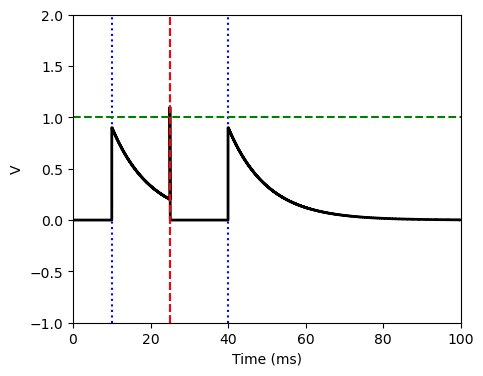

<Figure size 640x480 with 0 Axes>

In [2]:
LIF()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


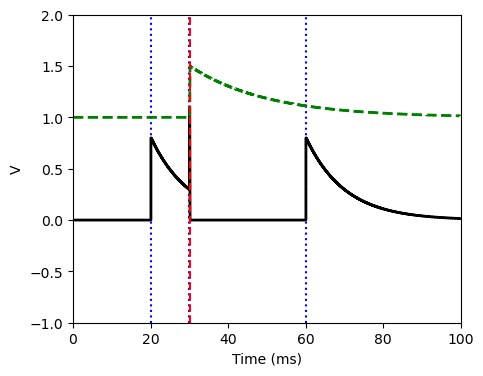

<Figure size 640x480 with 0 Axes>

In [3]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.close(fig)

# Function that runs the simulation
# tau: time constant (in ms)
# t0, t1, t2: time of three input spikes
# w: input synapse weight
# threshold: threshold value to produce a spike
# reset: reset value after a spike
def LIF_(tau=10, taut=20, t0=20, t1=30, t2=60, w=0.8, threshold=1.0, dthreshold=0.5, reset=0.0):
    # Spike times, keep sorted because it's more efficient to pop the last value off the list
    times = [t0, t1, t2]
    times.sort(reverse=True)
    # set some default parameters
    duration = 100 # total time in ms
    dt = 0.1 # timestep in ms
    alpha = np.exp(-dt/tau) # this is the factor by which V decays each time step
    beta = np.exp(-dt/taut) # this is the factor by which Vt decays each time step
    V_rec = [] # list to record membrane potentials
    Vt_rec = [] # list to record threshold values
    V = 0.0 # initial membrane potential
    Vt = threshold
    T = np.arange(np.round(duration/dt))*dt # array of times

    spikes = [] # list to store spike times
    # clear the axis and plot the spike times
    ax.clear()
    for t in times:
        ax.axvline(t, ls=':', c='b')
    # run the simulation
    for t in T:
        V_rec.append(V) # record
        Vt_rec.append(Vt)
        V *= alpha # integrate equations
        Vt = (Vt-threshold)*beta+threshold
        if times and t>times[-1]: # if there has been an input spike
            V += w
            times.pop() # remove that spike from list
        V_rec.append(V) # record V before the reset so we can see the spike
        Vt_rec.append(Vt)
        if V>Vt: # if there should be an output spike
            V = reset
            Vt += dthreshold
            spikes.append(t)
    # plot everything (T is repeated because we record V twice per loop)
    ax.plot(np.repeat(T, 2), V_rec, '-k', lw=2)
    ax.plot(np.repeat(T, 2), Vt_rec, '--g', lw=2)
    print(Vt_rec[:10])
    for t in spikes:
        ax.axvline(t, ls='--', c='r')
    ax.set_xlim(0, duration)
    ax.set_ylim(-1, 2)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('V')
    plt.tight_layout()
    display(fig)
LIF_()